In [2]:
#get data
import requests
import zipfile
from pathlib import Path
#setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
#if the image folder doesn't exist , download it and prepare it..
if image_path.is_dir():
  print(f"{image_path} directory exists")
else:
  print(f"Did not find {image_path} directory, creating....")
  image_path.mkdir(parents=True, exist_ok=True)
#download pizza, steak and sushi data from github
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("downloading pizza, steak..")
  f.write(request.content)

#unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
  print("unzipping pizza, steak, sushi data..")
  zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating....
downloading pizza, steak..
unzipping pizza, steak, sushi data..


In [3]:
#become one with the data
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directorires and {len(filenames)} images in {dirpath}")
    

In [4]:
walk_through_dir("/content/data/pizza_steak_sushi")

there are 2 directorires and 0 images in /content/data/pizza_steak_sushi
there are 3 directorires and 0 images in /content/data/pizza_steak_sushi/train
there are 0 directorires and 78 images in /content/data/pizza_steak_sushi/train/pizza
there are 0 directorires and 75 images in /content/data/pizza_steak_sushi/train/steak
there are 0 directorires and 72 images in /content/data/pizza_steak_sushi/train/sushi
there are 3 directorires and 0 images in /content/data/pizza_steak_sushi/test
there are 0 directorires and 25 images in /content/data/pizza_steak_sushi/test/pizza
there are 0 directorires and 19 images in /content/data/pizza_steak_sushi/test/steak
there are 0 directorires and 31 images in /content/data/pizza_steak_sushi/test/sushi


In [5]:
image_path

PosixPath('data/pizza_steak_sushi')

In [6]:
walk_through_dir(image_path)

there are 2 directorires and 0 images in data/pizza_steak_sushi
there are 3 directorires and 0 images in data/pizza_steak_sushi/train
there are 0 directorires and 78 images in data/pizza_steak_sushi/train/pizza
there are 0 directorires and 75 images in data/pizza_steak_sushi/train/steak
there are 0 directorires and 72 images in data/pizza_steak_sushi/train/sushi
there are 3 directorires and 0 images in data/pizza_steak_sushi/test
there are 0 directorires and 25 images in data/pizza_steak_sushi/test/pizza
there are 0 directorires and 19 images in data/pizza_steak_sushi/test/steak
there are 0 directorires and 31 images in data/pizza_steak_sushi/test/sushi


In [7]:
#setup train and testing paths
train_dir = image_path/"train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

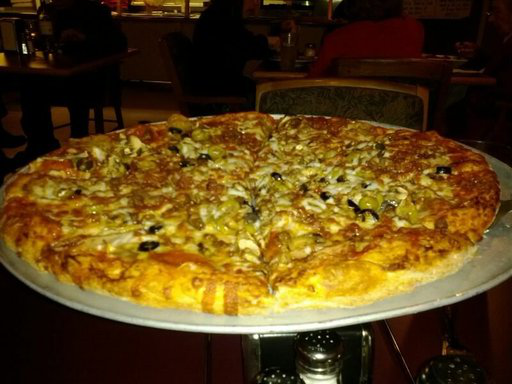

In [8]:
#visualize and image
from PIL import Image
Image.open("/content/data/pizza_steak_sushi/test/pizza/1152100.jpg")

In [9]:
image_path

PosixPath('data/pizza_steak_sushi')

In [10]:
# show an random image from the directory
import random
from PIL import Image
#random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))
#"data/pizza_steak_sushi/test/pizza/1152100.jpg"
#image_path/test/pizza/1142342.jpg
print(image_path_list[:5])
random_image_path = random.choice(image_path_list)
print(random_image_path)
#get image class from path name
image_class = random_image_path.parent.stem
# data/pizza_steak_sushi/train/pizza/1524655.jpg
#parent for 1524655.jpg is data/pizza_steak_sushi/train/pizza/
#stem means last part, here pizza
print(image_class)

[PosixPath('data/pizza_steak_sushi/train/pizza/68684.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/667309.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/220190.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2121603.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/3338774.jpg')]
data/pizza_steak_sushi/train/pizza/3530210.jpg
pizza


In [11]:
#matplot lib works on numpy array
import numpy as np
import matplotlib.pyplot as plt
img_as_array = np

#batch = 32 means, a model can look up 32 images at a time.
after getting some images in folder
* we need to make them compatible with pytorch by:
* Transform the data into tensors.
* turn the tensor data into a torch.utils.data.Datataset and later a torch.utils.data.DataLoader.

In [13]:
random.sample(image_path_list, k=3)

[PosixPath('data/pizza_steak_sushi/train/sushi/2674024.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3018077.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2124579.jpg')]

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  #put the model in train mode
  model.tarin()
  #setup tarian loss and train accuac values
  train_loss, train_acc = 0,
  #loop through data and abatche
  for batch, (X, y) in enumerate(dataloader):
    #send data to target device
    X, y = X.to(device), y.to(device)
    #forward pass
    y_pred = model(X)
    #calucalte loss
    loss = loss_fn(y_pred,y)
    train_loss += loss.item()
    #optizer
    optimizer.zero_grad()
    #loss backward
    loss.backward()
    #optimizer step
    optimizer.step()
    # to random paramerter of the model type
    # model_0.state_dict()
    #calculate and accumatel accuracy matrica lall batche
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_classs == y).sum().item() /len(y_pred)
    #adjust 

  train_loss = train_loss /len(dataloader)
  train_acc = train_acc /len(dataloader)
  return train_loss, train_acc

In [ ]:
#testing loop functin, all are same except for optimizer
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  #put model in eval model
  model.eval()
  #setup test loss and test accuracy values
  test_loss, test_acc = 0, 0
  #turn on inference context manager
  with torch.inference_mode():
    #loop throught Dataloader batche
    for batch , (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      test_pred_logits = model(X)
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()
      #calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmac(dim=1)
      test_acc += ((test_pred_labels ==y)).sum().item()/len(test_pred )
  test_loss = test_loss /len(dataloader)
  test_acc = test_acc /len(dataloader)
  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  #create results dictionary
  results = {"train_loss" :[],
             "train_acc" : [],
             "test_loss":[],
             "test_acc":[]}
  #loop through the training and testing steps for an num
  for epoch in tqdim(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader=train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer)
    test_loss, test_acc = test_step(model = model,
                                    dataloader = test_dataloader,
                                    loss_fn = loss_fn)
    #print out what's happening
    print(f"Epoch: {epoch+1} | " 
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc: .4f} | "
          f"test_loss: {test_loss: .4f} |"
          f"test_acc: {test_acc: .4f} ")
    #update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    #return the results dictionar
    return results

In [ ]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_3 = TinyVGG(input_shape=3, 
                  hidden_units =20,
                  output_shape = len(class_names).to(device))
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(). lr=0.001)
model_3_results = train(model= model_3, 
                        train_dataloader=train_dataloader,
                        test_dataloader = test_dataloadr,
                        optimzier = optimzier
                        epochs =20)

In [ ]:
# Download extra data
import requests
import zipfile
from pathlib import Path
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image _path} directroy, creating one...")
  image_path.mkdir(parents = True, exists_ok=True)
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
  request = requests.get("https:///link")
  print("Downloading pizza, steak, sushi 20% data ....")
  f.write(request.content)
  #unzip file
with zipfile.ZipFile(data_path /"pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
  print("unzipping pizza, steak, sushi 20% data ...")
  zip_ref.extractall(image_path)


In [ ]:
#after downloadin data set, turn data into datasets and dataloader
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"
train_data_20_percent_path, test_data_20_percent_path

In [ ]:
# imprt lib
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])
train_data_20_percent = ImageFolder(train_data_20_percent_path,
                                    transform = simple_transform)
test_data_20_percent = ImageFolder(test_data_20_percent_path,
                                   transform = simple_transform)
#loader
train_dataloader_20_percent = DataLoader()